In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import draft_v2
import sympy as sp

**OGRePy: An <u>O</u>bject-Oriented <u>G</u>eneral <u>Re</u>lativity Package for <u>Py</u>thon\
By [Barak Shoshany](https://github.com/bshoshany) ([baraksh@gmail.com](mailto:baraksh@gmail.com)) ([baraksh.com](https://baraksh.com/))\
v1.2.0 (2024-09-15)\
GitHub repository: <https://github.com/bshoshany/OGRePy>\
Documentation: <a href="c:/Users/lukas/AppData/Local/Programs/Python/Python313/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.ipynb">.ipynb</a>, <a href="c:/Users/lukas/AppData/Local/Programs/Python/Python313/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.pdf">.pdf</a>, <a href="#" onclick="window.open('file:///c:/Users/lukas/AppData/Local/Programs/Python/Python313/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.html', '_blank')">.html</a>**

In [2]:
# definig variables 
gamma = sp.log(2) / (sp.sqrt(3) * sp.pi)
beta_b, beta_c = 0, 0
L_0 = 5 
M = 1 # Mass of the BH

# definitions to calculate Q_b/c in dependence of beta and L_0 which gives us more possibilitys  to compare the influence of Q_b/c on different eq.
def Q_b (beta_b, L_0):
    return abs(beta_b) * gamma ** 2 * L_0 ** 2

def Q_c (beta_c, L_0):
    return abs(beta_c) * gamma ** 2 * L_0 ** 6

# defining the functions f, g and h 
def functions(r, param = [beta_b, beta_c, L_0]):
    beta_b, beta_c, L_0 = param
    Q_b_value = Q_b(beta_b, L_0)
    Q_c_value = Q_c(beta_c, L_0)

    R_s = 2 * M

    f = (1 + Q_b_value / r**2) * (1 + Q_c_value * R_s**2 / (4 * r**8))**(-1 / 4) * ( 1 - R_s / sp.sqrt(r**2 + Q_b_value))
    g = (1 + Q_c_value * R_s**2 / (4 * r**8))**(1 / 4) * (1 - R_s / sp.sqrt(r**2 + Q_b_value))**(-1)
    h = r**2 * (1 + Q_c_value * R_s**2 / (4 * r**8))**(1 / 4)

    return f, g, h

f = lambda r, param: functions(r ,param)[0]
g = lambda r, param: functions(r ,param)[1]
h = lambda r, param: functions(r ,param)[2]

**OGRePy**: You have the latest version of the package.

In [3]:
BH = draft_v2.BH(f, g, h, [beta_b, beta_c, L_0])

In [5]:
BH.metric()

$$\eta{}_{\mu}{}_{\nu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}-1 + \frac{2}{r} & 0 & 0 & 0\\0 & \frac{1}{1 - \frac{2}{r}} & 0 & 0\\0 & 0 & r^{2} & 0\\0 & 0 & 0 & r^{2} \sin^{2}{\left(\theta \right)}\end{matrix}\right)$$

In [6]:
BH.V_eff()

-(-1 + 2/r)/r**2

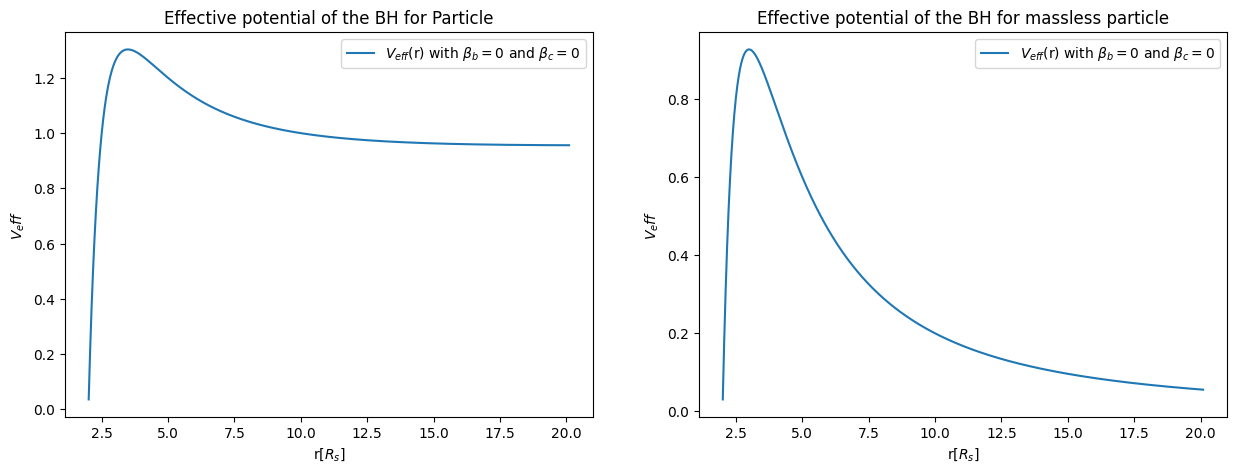

In [7]:
r_list = np.array(np.linspace(2 * M + 0.01, (2 * M + 0.01) * 10, 1000))

V_eff_list = BH.V_eff(r_list, 0, L_0)
V_eff_list_particle = BH.V_eff(r_list, -1, L_0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(r_list, V_eff_list_particle, label=fr'$V_{{eff}}$(r) with $\beta_b = 0$ and $\beta_c = 0$')  


ax1.set_title('Effective potential of the BH for Particle') 
ax1.set_xlabel('r[$R_s$]')
ax1.set_ylabel('$V_eff$') 

ax1.legend()

ax2.plot(r_list, V_eff_list, label=fr'$V_{{eff}}$(r) with $\beta_b = 0$ and $\beta_c = 0$')  


ax2.set_title('Effective potential of the BH for massless particle') 
ax2.set_xlabel('r[$R_s$]')
ax2.set_ylabel('$V_eff$') 

ax2.legend()
plt.show()

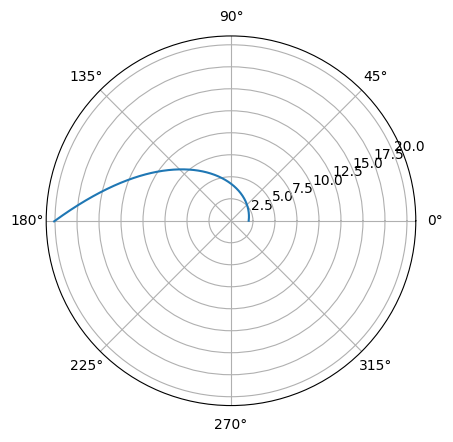

In [11]:
r_list = np.array(np.linspace(2 * M + 0.01, (2 * M + 0.01) * 10, 1000))

BH.V_eff(1)
min, max = BH.min_max_V_eff(-1, L_0)
min

phi_list=BH.phi(r_list, [r_list[0], r_list[len(r_list)-1]],L=20)
# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot data
ax.plot(phi_list, r_list)